In [205]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

colors = [
    "#FF6F00",  # eastern canada
    "#00A2FF",  # midwest
    "#00C853",  # northeast
    "#FFD600",  # pacifc
    "#AA00FF",  # rockies
    "#D50000",  # western canada
]

In [157]:
region_map = {
    'Colorado': 'Rockies',
	'British Columbia': 'Western Canada',
	'California': 'Pacific',
	'Montana': 'Rockies',
	'Idaho': 'Rockies',
	'Utah': 'Rockies',
	'Vermont': 'Northeast',
	'Washington': 'Pacific',
	'Oregon': 'Pacific',
	'Wyoming': 'Rockies',
	'New York': 'Northeast',
	'Maine': 'Northeast',
	'Alberta': 'Western Canada',
	'New Mexico': 'Rockies',
	'New Hampshire': 'Northeast',
	'Quebec': 'Eastern Canada',
	'Alaska': 'Pacific',
	'Michigan': 'Midwest',
	'Nevada': 'Pacific',
	'Arizona': 'Rockies',
	'Minnesota': 'Midwest',
	'South Dakota': 'Midwest',
	'Newfoundland and Labrador': 'Eastern Canada',
	'Pennsylvania': 'Northeast',
	'Wisconsin': 'Midwest',
    'Ontario': 'Eastern Canada',
    'West Virginia': 'Northeast',
    'Illinois': 'Midwest',
}
ski_areas['region'] = ski_areas['state'].map(region_map)

## Cleaned Stats

In [231]:
data = pd.read_csv('ski-stats.csv')

In [243]:
def convert_to_int(x):
    x = x.fillna(-1).astype(str).str.replace(',','').astype(float).astype(int)
    x.loc[x == -1] = np.nan
    return x

numeric_fields = [
    'base_elevation',
	'base_public_lift_elevation',
	'peak_public_lift_elevation',
	'peak_elevation',
	'max_lift_served_run_vert',
	'advertised_acres',
	'skiable_acres',
	'public_skiable_acres',
	'public_lift_served_skiable_acres',
	'public_boundary_area',
]

In [245]:
data = data.dropna(subset=['base_elevation'])
for f in numeric_fields:
    data[f] = convert_to_int(data[f])

data['region'] = data['state'].map(region_map)
data['vertical_drop'] = data['peak_elevation'] - data['base_elevation']

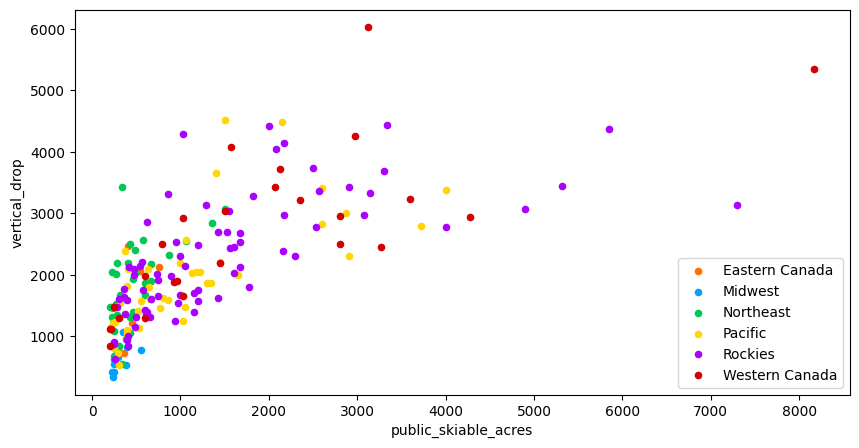

In [246]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

for region, color in zip(regions,colors):
    data.query(f"region == '{region}'").plot(
        kind='scatter', x='public_skiable_acres', y='vertical_drop', label=region, ax=ax, c=color)

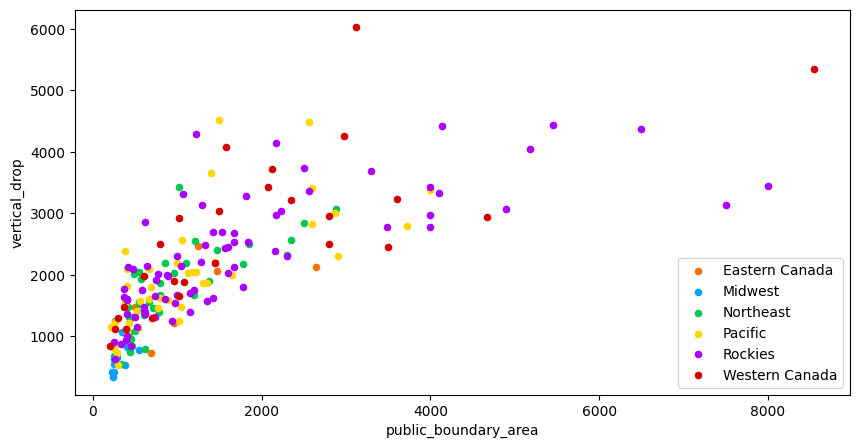

In [247]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

for region, color in zip(regions,colors):
    data.query(f"region == '{region}'").plot(
        kind='scatter', x='public_boundary_area', y='vertical_drop', label=region, ax=ax, c=color)

In [251]:
data['advert_to_boundary']  = data['advertised_acres']/data['public_boundary_area']

Text(0, 0.5, 'Advertised Skiable Acres / \n boundary-to-boundary area')

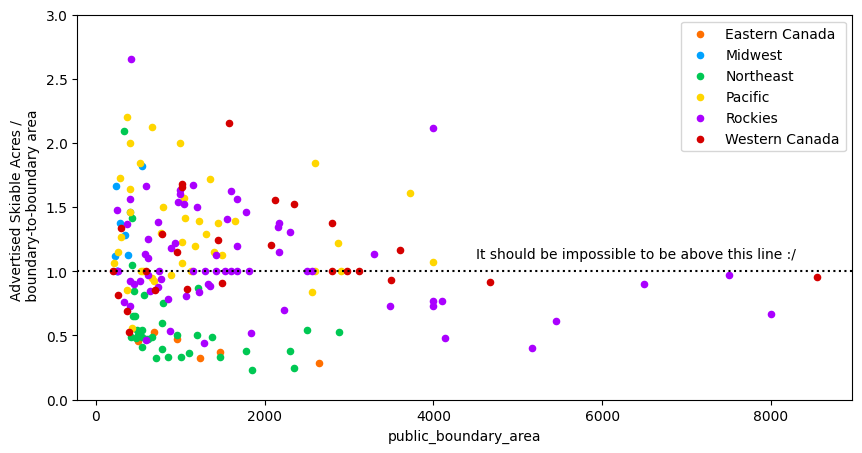

In [268]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

for region, color in zip(regions,colors):
    data.query(f"region == '{region}'").plot(
        kind='scatter', x='public_boundary_area', y='advert_to_boundary', label=region, ax=ax, c=color)
ax.axhline(1.0, color='k', linestyle=':')
ax.set_ylim(0,3);
ax.text(4500, 1.1,"It should be impossible to be above this line :/")
ax.set_ylabel("Advertised Skiable Acres / \n boundary-to-boundary area")